In [122]:
import tensorflow as tf
import sys
import re
import os
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk

data_path = '/proj/NIRAL/users/siyangj/NeonateMRISeg/TrialData/'
min_path = '/nas/longleaf/home/siyangj/myNIRAL/myTrialData/BUSS_reg_stripped_scaled/minimal/'
normal_path = '/nas/longleaf/home/siyangj/myNIRAL/myTrialData/BUSS_reg_stripped_scaled/min_normal/'
to_inf_path = '/nas/longleaf/home/siyangj/myNIRAL/myTrialData/BUSS_reg_stripped_scaled/to_inf/'

In [49]:
T1_re = re.compile(r'(BUSS_\d{4})_T1_reg-stripped_scaled.nrrd')

slice_min = 4

files = os.listdir(data_path)

for f in files:
    im_match = T1_re.match(f)
    if im_match is None:
        continue
    im_T1 = sitk.ReadImage(os.path.join(data_path,f))
    im_T2 = sitk.ReadImage(os.path.join(data_path,
                                        im_match.group(1)+'_T2_reg-stripped_scaled.nrrd'))
    im_size = im_T1.GetSize()
    
    #non0 = np.where(np.logical_and(sitk.GetArrayFromImage(im_T1)>0,
    #                               sitk.GetArrayFromImage(im_T2)>0).swapaxes(0,2))
    
    #crop_l = [int(min(non0[i])) for i in range(3)]
    #crop_u = [int(im_size[i]-max(non0[i])-1) for i in range(3)]
    
    non0 = np.logical_and(sitk.GetArrayFromImage(im_T1)>0,
                          sitk.GetArrayFromImage(im_T2)>0).swapaxes(0,2)

    more_than_min = (np.where(non0.sum(axis=2).sum(axis=1)>slice_min)[0],
                     np.where(non0.sum(axis=2).sum(axis=0)>slice_min)[0],
                     np.where(non0.sum(axis=1).sum(axis=0)>slice_min)[0])
    
    crop_l = [int(min(more_than_min[i])) for i in range(3)]
    crop_u = [int(im_size[i]-max(more_than_min[i])-1) for i in range(3)]
    
    #print(crop_l,crop_u)
    
    new_T1 = sitk.Crop(im_T1,crop_l,crop_u)
    new_T2 = sitk.Crop(im_T2,crop_l,crop_u)
    
    sitk.WriteImage(new_T1,os.path.join(min_path,'T1',im_match.group(1)+'.nrrd'))
    sitk.WriteImage(new_T2,os.path.join(min_path,'T2',im_match.group(1)+'.nrrd'))
    
    new_size = new_T1.GetSize()
    if new_size[0]>96 or new_size[0]>112 or new_size[0]>96:
        print(im_match.group(1),im_size,im_T1.GetSpacing(),new_T1.GetSize())    

In [126]:
tar_size = [96,112,96]

files = os.listdir(os.path.join(min_path,'T1'))

for f in files:
    im_T1 = sitk.ReadImage(os.path.join(min_path,'T1',f))
    im_T2 = sitk.ReadImage(os.path.join(min_path,'T2',f))
    im_size = im_T1.GetSize()
    
    pad_l = [0,0,0]
    pad_u = [0,0,0]
    
    for i in range(3):
        if tar_size[i]>im_size[i]:
            d = tar_size[i]-im_size[i]
            pad_l[i] = int(round(d/2))
            pad_u[i] = int(d-pad_l[i])
    
    new_T1 = sitk.ConstantPad(im_T1,pad_l,pad_u)
    new_T2 = sitk.ConstantPad(im_T2,pad_l,pad_u)
    
    print(im_size,new_T1.GetSize())
    
    sitk.WriteImage(new_T1,os.path.join(to_inf_path,'T1',f))
    sitk.WriteImage(new_T2,os.path.join(to_inf_path,'T2',f))


(99, 119, 91) (99, 119, 96)
(96, 119, 96) (96, 119, 96)
(100, 118, 98) (100, 118, 98)
(99, 128, 103) (99, 128, 103)
(91, 109, 95) (96, 112, 96)
(91, 104, 94) (96, 112, 96)
(101, 115, 95) (101, 115, 96)
(108, 119, 99) (108, 119, 99)
(99, 117, 95) (99, 117, 96)
(98, 132, 103) (98, 132, 103)
(99, 115, 90) (99, 115, 96)
(102, 111, 96) (102, 112, 96)
(97, 112, 96) (97, 112, 96)
(90, 121, 99) (96, 121, 99)
(95, 120, 96) (96, 120, 96)
(95, 111, 97) (96, 112, 97)
(93, 110, 90) (96, 112, 96)
(102, 125, 101) (102, 125, 101)
(112, 125, 103) (112, 125, 103)
(94, 108, 94) (96, 112, 96)
(102, 114, 97) (102, 114, 97)
(102, 113, 94) (102, 113, 96)
(105, 120, 99) (105, 120, 99)
(103, 126, 97) (103, 126, 97)
(97, 118, 90) (97, 118, 96)
(106, 114, 99) (106, 114, 99)
(89, 108, 91) (96, 112, 96)
(95, 105, 91) (96, 112, 96)
(99, 125, 94) (99, 125, 96)
(97, 112, 92) (97, 112, 96)
(99, 115, 95) (99, 115, 96)
(93, 107, 90) (96, 112, 96)
(93, 107, 97) (96, 112, 97)
(94, 117, 96) (96, 117, 96)
(95, 112, 92) (96,

In [128]:
tar_size = [96,112,96]

files = os.listdir(os.path.join(to_inf_path,'T1'))

for f in files:
    im_T1 = sitk.ReadImage(os.path.join(to_inf_path,'T1',f))
    im_T2 = sitk.ReadImage(os.path.join(to_inf_path,'T2',f))
    im_size = im_T1.GetSize()
    if tar_size[0]==im_size[0] and tar_size[1]==im_size[1] and tar_size[2]==im_size[2]:
        print(f)

BUSS_2005.nrrd
BUSS_2018.nrrd
BUSS_2103.nrrd
BUSS_2239.nrrd
BUSS_2153.nrrd
BUSS_2138.nrrd
BUSS_2122.nrrd
BUSS_2190.nrrd
BUSS_2035.nrrd
BUSS_2150.nrrd
BUSS_2143.nrrd
BUSS_2087.nrrd
BUSS_2079.nrrd
BUSS_2112.nrrd
BUSS_2002.nrrd
BUSS_2186.nrrd
BUSS_2134.nrrd


In [31]:
arr = np.random.rand(2,2)

In [39]:
A = np.random.rand(2,2)
B = np.random.rand(2,2)
np.where(np.logical_and(A>0,B>0).swapaxes(0,1))

(array([0, 0, 1, 1]), array([0, 1, 0, 1]))

In [18]:
im_size = [1,1,1]
dim_diff = [im_size[i]-tar_dim[i] for i in range(3)]
dim_diff

[-95, -111, -95]

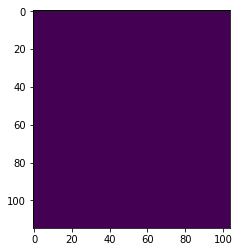

In [60]:
plt.imshow(sitk.GetArrayFromImage(sitk.ReadImage(
    os.path.join(min_path,'T2','BUSS_2137.nrrd')))[:,129,:])

In [71]:
np.where(sitk.GetArrayFromImage(sitk.ReadImage(
    os.path.join(min_path,'T2','BUSS_2137.nrrd')))[:,128,:]>0)

(array([], dtype=int64), array([], dtype=int64))

In [102]:
max(np.where(
    (sitk.GetArrayFromImage(sitk.ReadImage(
    os.path.join(min_path,'T2','BUSS_2039.nrrd')))>0).swapaxes(0,2).sum(axis=0).sum(axis=1)>4
)[0])

125

In [121]:
(sitk.GetArrayFromImage(sitk.ReadImage(
    os.path.join(min_path,'T2','BUSS_2137.nrrd')))>0).sum(axis=0).sum(axis=0)

array([ 214,  498,  778, 1141, 1509, 1864, 2302, 2692, 3022, 3368, 3670,
       3912, 4173, 4421, 4650, 4868, 5062, 5271, 5407, 5677, 5852, 6047,
       6213, 6353, 6490, 6634, 6775, 6902, 7049, 7178, 7283, 7410, 7513,
       7632, 7696, 7774, 7868, 7926, 7968, 8024, 8055, 8054, 8069, 8035,
       8108, 8163, 8255, 8299, 8348, 8331, 8348, 8292, 8209, 8025, 8013,
       7993, 7996, 8026, 8073, 8133, 8179, 8188, 8204, 8188, 8188, 8166,
       8126, 8053, 7983, 7904, 7830, 7733, 7629, 7514, 7388, 7260, 7113,
       6948, 6787, 6595, 6414, 6206, 5978, 5743, 5493, 5250, 4979, 4766,
       4543, 4334, 4086, 3829, 3560, 3291, 3034, 2713, 2461, 2172, 1907,
       1608, 1325, 1022,  735,  423])

In [107]:
more_than_min

(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108]),
 array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
 

In [111]:
np.where(non0.sum(axis=0).sum(axis=1)>4)

(array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131]),)

In [115]:
non0.sum(axis=0).shape

(140, 130)